# Visualize NEAT Training Logs

In [221]:
import os
import json
import matplotlib.pyplot as plt

In [222]:
# Directory containing log files
log_dir = "./logs"

# Collect all JSON files
log_files = [f for f in os.listdir(log_dir) if f.endswith('.json')]

# Load and sort logs by generation
logs = []
for fname in log_files:
    with open(os.path.join(log_dir, fname), 'r') as f:
        data = json.load(f)
        logs += data
logs = sorted(logs, key=lambda d: d['generation'])
# logs = [i for i in logs if i["generation"] < 20]
# Extract metrics
generations = [d['generation'] for d in logs]
best_fitness = [d['best_fitness'] for d in logs]
avg_fitness = [d['avg_fitness'] for d in logs]
avg_game_reward = [d['avg_game_reward'] for d in logs]
avg_shaped_reward = [d['avg_shaped_reward'] for d in logs]
best_game_reward = [d.get('best_game_reward', 0) for d in logs]
best_shaped_reward = [d.get('best_shaped_reward', 0) for d in logs]


In [224]:
# Find all generations where best_game_reward is equal to the maximum value
max_game_reward = max(best_game_reward)
max_indices = [i for i, v in enumerate(best_game_reward) if v == max_game_reward]
best_generations = [generations[i] for i in max_indices]

print(f"Best game reward: {max_game_reward} at generations {best_generations}")

Best game reward: 1.8 at generations [1265, 1275]


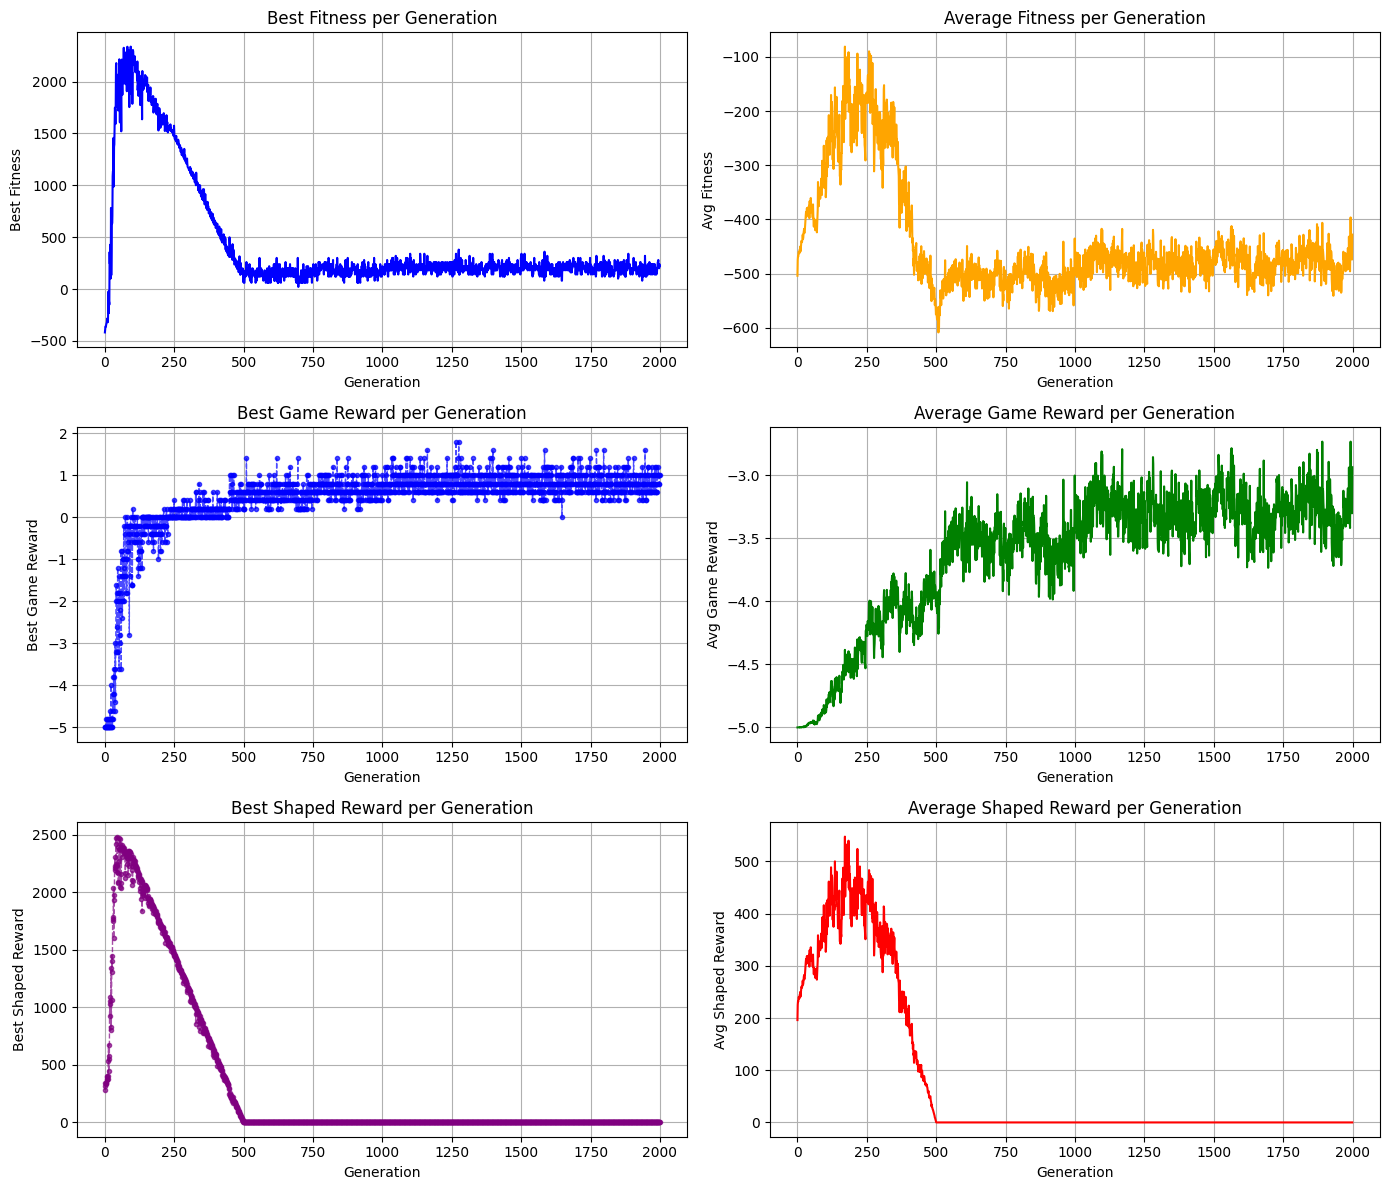

In [225]:
plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
plt.plot(generations, best_fitness, label='Best Fitness', color='blue')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness per Generation')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(generations, avg_fitness, label='Avg Fitness', color='orange')
plt.xlabel('Generation')
plt.ylabel('Avg Fitness')
plt.title('Average Fitness per Generation')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(generations, best_game_reward, label='Best Game Reward', color='blue', linestyle='--', linewidth=1, marker='o', markersize=3, alpha=0.7)
plt.xlabel('Generation')
plt.ylabel('Best Game Reward')
plt.title('Best Game Reward per Generation')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(generations, avg_game_reward, label='Avg Game Reward', color='green')
plt.xlabel('Generation')
plt.ylabel('Avg Game Reward')
plt.title('Average Game Reward per Generation')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(generations, best_shaped_reward, label='Best Shaped Reward', color='purple', linestyle='--', linewidth=1, marker='o', markersize=3, alpha=0.7)
plt.xlabel('Generation')
plt.ylabel('Best Shaped Reward')
plt.title('Best Shaped Reward per Generation')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(generations, avg_shaped_reward, label='Avg Shaped Reward', color='red')
plt.xlabel('Generation')
plt.ylabel('Avg Shaped Reward')
plt.title('Average Shaped Reward per Generation')
plt.grid(True)

plt.tight_layout()
plt.show()
